# import Data

In [20]:
# imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_json('votes.json')
 
print(df)

          party  infants  water  budget  physician  salvador  religious  \
0    republican        0      1       0          1         1          1   
1    republican        0      1       0          1         1          1   
2      democrat        0      1       1          0         1          1   
3      democrat        0      1       1          0         1          1   
4      democrat        1      1       1          0         1          1   
5      democrat        0      1       1          0         1          1   
6      democrat        0      1       0          1         1          1   
7    republican        0      1       0          1         1          1   
8    republican        0      1       0          1         1          1   
9      democrat        1      1       1          0         0          0   
10   republican        0      1       0          1         1          0   
11   republican        0      1       0          1         1          1   
12     democrat        0 

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

In [22]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [23]:
# Summerize statistics
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


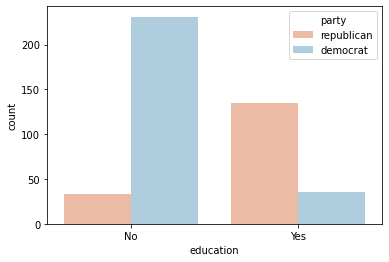

In [24]:
# Visual EDA

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x = 'education', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [25]:
# Fit a k-Nearest neighbors classifier

Y = df['party'].values

X = df.drop('party', axis = 1).values

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=6)

In [26]:
#Predict a k-Nearest neighbors with training data set

from sklearn.model_selection import train_test_split

# split to training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)

# output prediction
new_prediction = knn.predict(X_train)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'democrat' 'repub

# Check model accuracy  


In [27]:
print(knn.score(X_test, Y_test))

0.9425287356321839
